In [1]:
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np

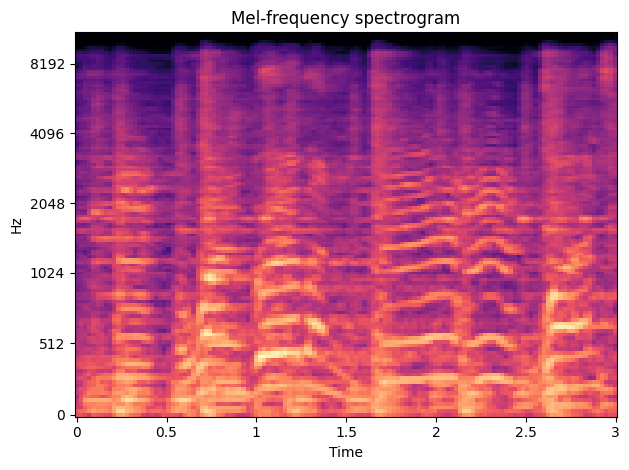

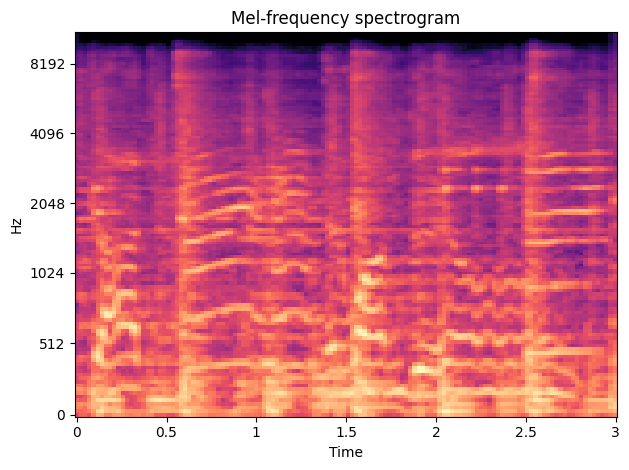

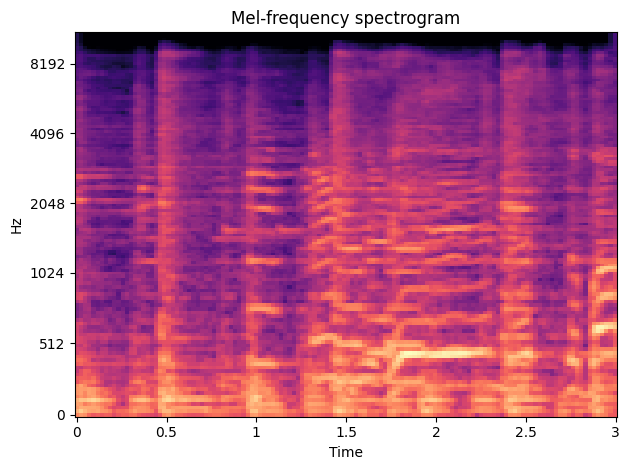

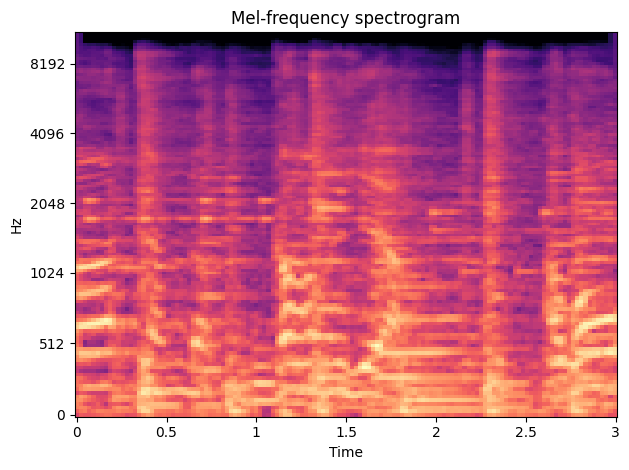

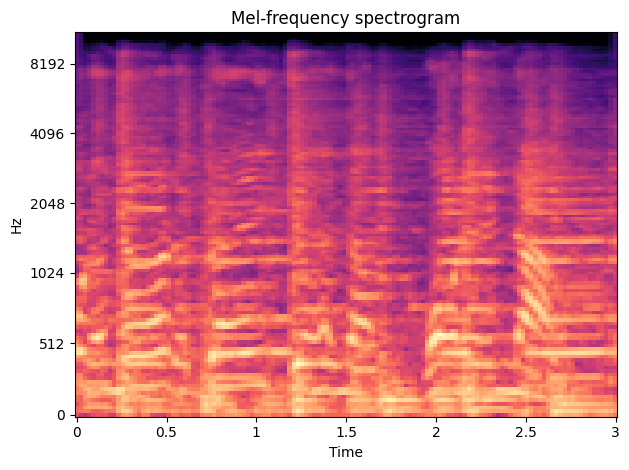

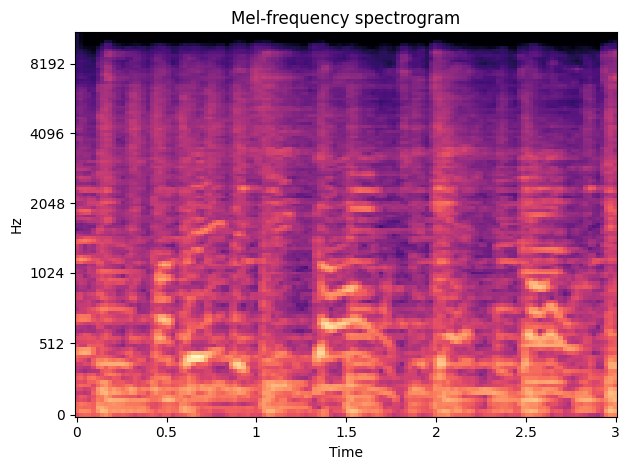

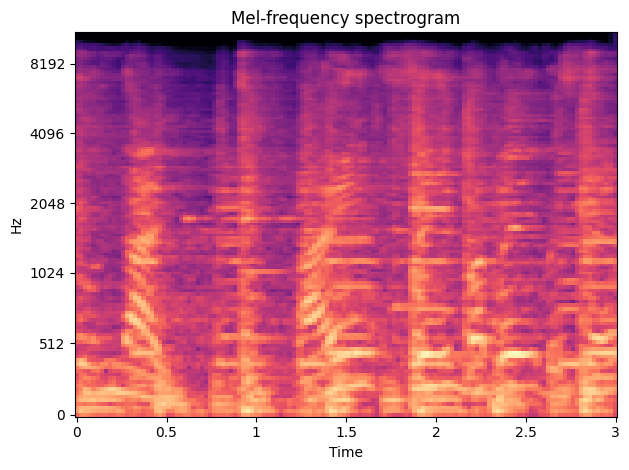

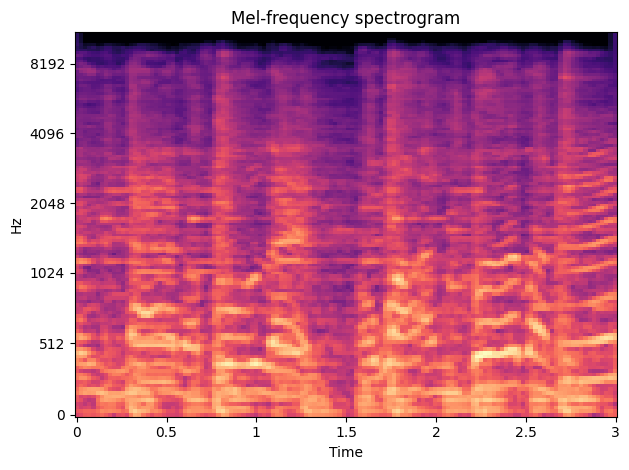

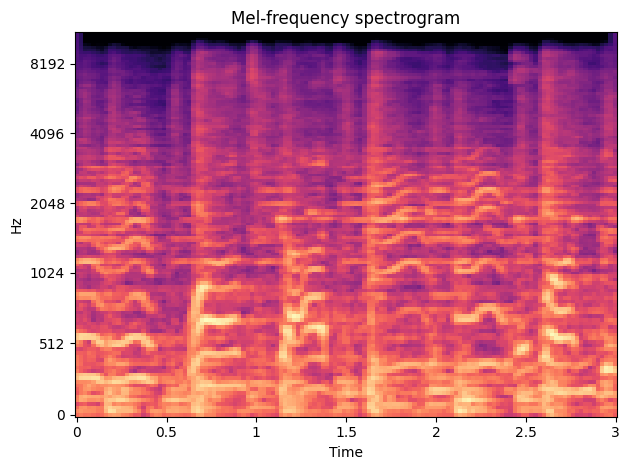

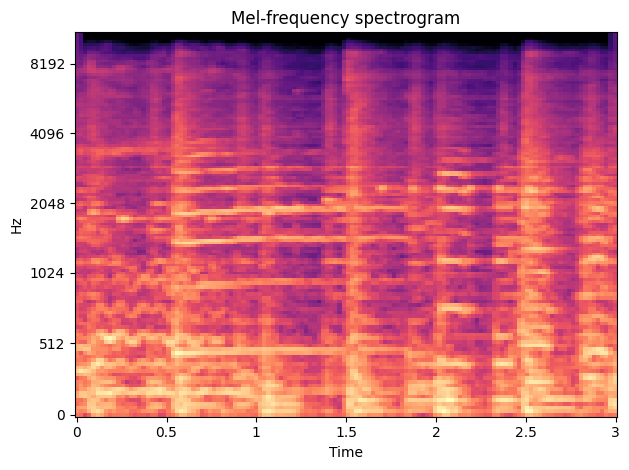

In [2]:
# Generates a mel scaled spectrograms for every 3 seconds part of a .wav file
def generate_spectrograms(wav_file, output_path, display_spectrogram=False):
    # Load the wav file using librosa
    y, sr = librosa.load(wav_file)

    # Calculate the number of samples for 3 seconds
    samples_3s = 3 * sr

    # Divide the wav file into 3-second parts
    for i in range(0, len(y) - samples_3s + 1, samples_3s):
        y_part = y[i:i+samples_3s]

        # Generate the spectrogram
        S = librosa.feature.melspectrogram(y=y_part, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        # Save the spectrogram to the output path
        file_name = f"{os.path.splitext(os.path.basename(wav_file))[0]}_{i//samples_3s}.png"
        os.makedirs(output_path, exist_ok=True)
        output_file = os.path.join(output_path, file_name)

        # Create and save the spectrogram image
        plt.figure()
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.axis('off')
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Display the spectrogram
        if display_spectrogram:
            plt.figure()
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.title('Mel-frequency spectrogram')
            plt.tight_layout()
            plt.show()




audio_files_root_dir = os.path.join('Data', 'genres_original')
spectrograms_root_dir = os.path.join('Data', 'spectrograms')
display_spectrogram = True

# loop through all wav files
for root, _, files in os.walk(audio_files_root_dir):
    for file in files:
        if not file.lower().endswith('.wav'):
            continue
        wav_file = os.path.join(root, file)
        genre = file.split('.')[0]
        generate_spectrograms(wav_file, os.path.join(spectrograms_root_dir, genre), display_spectrogram)
        display_spectrogram = False

In [2]:
test

4